In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics



In [2]:
df=pd.read_csv('../input/weatherww2/Summary of Weather.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

 **Defining the Variables where the values of Columns of Min and Max Temp can be stored.**

In [5]:
X=df.iloc[:,5].values
Y=df.iloc[:,6].values

**Checking the null values in both the columns, if any?**

In [6]:
print(df['MinTemp'].isnull().any())
print(df['MaxTemp'].isnull().any())

False
False


**Plotting the MinTemp on X axis and MaxTemp on Y axis through scatter plot.**

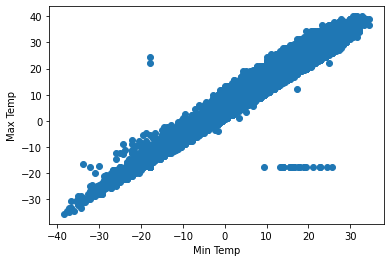

In [7]:
plt.scatter(X,Y)
plt.xlabel('Min Temp')
plt.ylabel('Max Temp')
plt.show()

**Splitting the Data into train-test split(70:30).**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)

In [9]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

**Defining the Model ie, Linear Regression here.** 
**Fitting the model.**


In [10]:
from sklearn.linear_model import LinearRegression
ref = LinearRegression()
ref.fit(X_train, y_train)
y_pred4 = ref.predict(X_test)

**Checking the Accuracy of y_pred and y_test through scatter plot.**

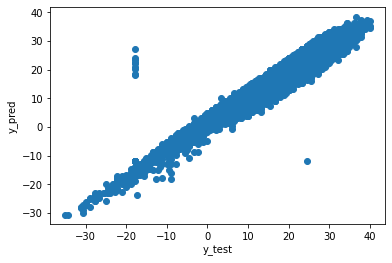

In [11]:
plt.scatter(y_test,y_pred4)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

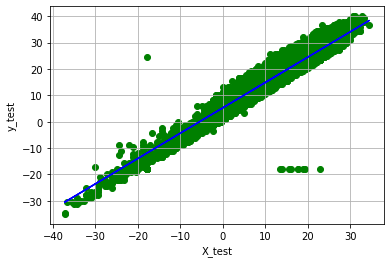

In [12]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test,y_pred4,color='blue')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.grid()
plt.show()

In [13]:
print('m :', ref.coef_)
print('c :', ref.intercept_)

m : [[0.96127125]]
c : [5.31010575]


In [14]:
r2 = ref.score(X_test, y_test)
print('R2 :',r2)

R2 : 0.9318568147696291


In [15]:
print("mean_squared_error :",metrics.mean_squared_error(y_test, y_pred4))

mean_squared_error : 4.6960056938186145


# ****Now we will use user define function for prediction

In [16]:
df.shape

(119040, 31)

In [17]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [18]:
X_train = df.iloc[:83329, 5]
X_test = df.iloc[83329:, 5]
Y_train = df.iloc[:83329, 4]
Y_test = df.iloc[83329:, 4]

In [19]:
print(X_test[:10])
print(len(X_train))

83329    20.000000
83330    22.222222
83331    17.222222
83332    15.555556
83333    15.000000
83334    14.444444
83335    15.000000
83336    13.333333
83337    14.444444
83338    16.666667
Name: MinTemp, dtype: float64
83329


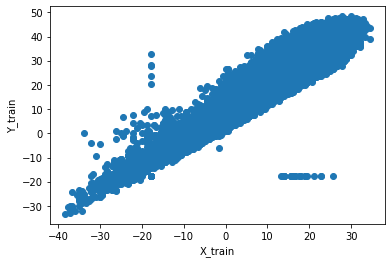

In [20]:
plt.scatter(X_train, Y_train)
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

In [21]:
# we have to find out the mean
x_ = np.mean(X_train)
y_ = np.mean(Y_train)
print(x_, y_)

17.846067995457428 27.073534490422233


In [22]:
def find_sploe(X, Y, x_, y_):
    dem = 0
    newm = 0
    for i in range(len(X)):
        dem += (X[i] - x_) * (Y[i] - y_)
        newm += (X[i] - x_) ** 2
    return dem / newm

In [23]:
M = find_sploe(X_train, Y_train, x_, y_)
print('M : ', M)

# y = mx + c is the equation of line
# and now we have to find out the y_intercept
# we have one point (x_, y_) on line and sploe of line(M)
c = y_ - M * x_ 
print("c : ",c)

M :  0.9564942836256293
c :  10.003872467572911


In [24]:
# y = M x + c
# y_pred is predicted value for X_train
y_pred = []
for i in X_train:
    y_pred.append(0.9564942836256293 * i + 10.003872467572915)
    # print(i)

In [25]:
df = pd.DataFrame({'Actual': Y_train, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,25.555556,31.259301
1,28.888889,30.727915
2,26.111111,31.259301
3,26.666667,31.259301
4,26.666667,30.727915


In [26]:
mse = (1/len(X_train)) * np.sum(val ** 2 for val in (Y_train - (M*X_train + c)))
print('mean_squared_error :',mse)
print('mean_squared_error :',metrics.mean_squared_error(Y_train, y_pred))

mean_squared_error : 17.316845926833135
mean_squared_error : 17.316845926833587


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


In [27]:
# we will find the R2 = ?
def find_score_r2(Y, y_pred, y_):
    d = n = 0
    i = 0
    for j in Y:
        d += (y_pred[i] - y_) ** 2
        n += (j - y_) ** 2
        i += 1
    # d = np.sum(val ** 2 for val in (y_pred - y_))
    # n = np.sum(val ** 2 for val in (Y - y_))
    R2 = 1 - (d / n)

    return R2

In [28]:
print("R2 : ", find_score_r2(Y_train, y_pred, y_))

R2 :  0.20096813651817225


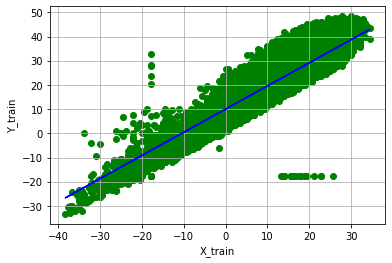

In [29]:
plt.scatter(X_train, Y_train, color='green')
plt.plot(X_train, y_pred, color='blue')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.grid()
plt.show()

# ****Gradient descent

In [30]:
# we will find out the best fit line 

def gradient_descent(X, Y):
    m_cur = c_cur = 0
    iteration = 15000
    n = len(X)
    learning_rate = 0.002
    
    for i in range(iteration):
        y_pred2 = m_cur * X + c_cur
        mse = (1/n) * sum(val ** 2 for val in (Y - y_pred2))
        md = - (2/n) * sum(X*(Y - y_pred2))
        cd = -(2/n) * sum(Y - y_pred2)
        
        m_cur = m_cur - learning_rate * md
        c_cur = c_cur - learning_rate * cd
        
        print("m {}, c {}, cost {}, iteration {}".format(m_cur, c_cur, mse, i))

In [31]:
# gradient_descent(X_train, Y_train)

gradient_descent(X, Y)
Now i just predict values for X_test
By using Y = (0.9564942836256293 * X) + 10.003872467572915

In [32]:
y_pred3 = []
for i in X_test:
    y_pred3.append( (0.9564942836256293 * i) + 10.003872467572915)

In [33]:
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred3})
df2.head()

,Actual,Predicted
83329,35.000000,29.133758
83330,35.000000,31.259301
83331,27.777778,26.476830
83332,26.666667,24.882672
83333,22.777778,24.351287


In [34]:
mse = (1/len(X_test)) * np.sum(val ** 2 for val in (Y_test - (0.9564942836256293*X_test + 10.003872467572915)))
print('mean_squared_error :',mse)
print('mean_squared_error :',metrics.mean_squared_error(Y_test, y_pred3))

mean_squared_error : 17.797347984629788
mean_squared_error : 17.797347984629933


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


In [35]:
print('R2 :',find_score_r2(Y_test, y_pred3, y_))

R2 : 0.0206503724879743


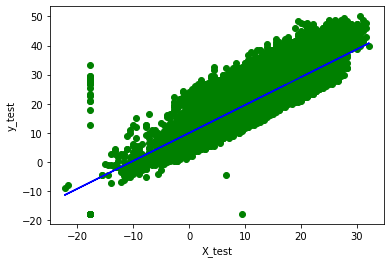

In [36]:
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_test, y_pred3, color='blue')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()

# blue line is predicted point (y_pred3)